### EDA & Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from learningcurve import plot_learning_curve
from validationcurve import plot_validation_curve

In [3]:
# Load data from CSV
data_file_path = 'https://raw.githubusercontent.com/faisalbegins/MLData/master/weather_history.csv'
data = pd.read_csv(data_file_path)

In [4]:
# checking the head of the dataset to get a brief idea about the dataset
data.head()

,Humidity,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0.89,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,0.86,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,0.89,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,0.83,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,0.83,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
# checking the shape of the dataset
data.shape

(96453, 12)

In [6]:
# Checking information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Humidity                  96453 non-null  float64
 1   Formatted Date            96453 non-null  object 
 2   Summary                   96453 non-null  object 
 3   Precip Type               95936 non-null  object 
 4   Temperature (C)           96453 non-null  float64
 5   Apparent Temperature (C)  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
# checking the statistics of the dataset for better understanding
data.describe()

,Humidity,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,0.734899,11.932678,10.855029,10.810640,187.509232,10.347325,0.0,1003.235956
std,0.195473,9.551546,10.696847,6.913571,107.383428,4.192123,0.0,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.600000,4.688889,2.311111,5.828200,116.000000,8.339800,0.0,1011.900000
50%,0.780000,12.000000,12.000000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,0.890000,18.838889,18.838889,14.135800,290.000000,14.812000,0.0,1021.090000
max,1.000000,39.905556,39.344444,63.852600,359.000000,16.100000,0.0,1046.380000


### Data Cleanup

In [8]:
# Checking the value counts of 'Loud Cover' column
data['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [9]:
# all the rows of Loud Cover column have zero value, so we will remove it
data.drop('Loud Cover', axis=1, inplace=True)

# removed Formatted Date, Daily Summary & Summary as they are not necessary
data.drop(['Formatted Date', 'Daily Summary', 'Summary'], axis=1, inplace=True)

# Check the dataset after removing fields
data

,Humidity,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.89,rain,9.472222,7.388889,14.1197,251.0,15.8263,1015.13
1,0.86,rain,9.355556,7.227778,14.2646,259.0,15.8263,1015.63
2,0.89,rain,9.377778,9.377778,3.9284,204.0,14.9569,1015.94
3,0.83,rain,8.288889,5.944444,14.1036,269.0,15.8263,1016.41
4,0.83,rain,8.755556,6.977778,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,0.43,rain,26.016667,26.016667,10.9963,31.0,16.1000,1014.36
96449,0.48,rain,24.583333,24.583333,10.0947,20.0,15.5526,1015.16
96450,0.56,rain,22.038889,22.038889,8.9838,30.0,16.1000,1015.66
96451,0.60,rain,21.522222,21.522222,10.5294,20.0,16.1000,1015.95


In [10]:
# check if there is any null value in the dataset
data.isnull().sum()

Humidity                      0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [11]:
# Checking the value counts of 'Precip Type' column
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [12]:
# Fill missing Precip Type values with rain as only around 500 hundred rows have missing values
data['Precip Type'].fillna(method='ffill', inplace=True, axis=0)

# cross check the value counts of 'Precip Type'
data['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [13]:
# Encoding 'Precip Type' values to convert string value to numeric value
precipitation_array = pd.get_dummies(data['Precip Type'])
data = pd.concat([data, precipitation_array], axis=1)
# after transformation we don't need the 'Precip Type' anymore so dropping it
data.drop('Precip Type', axis=1, inplace=True)

# cross check the data after encoding
data.head()

,Humidity,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),rain,snow
0,0.89,9.472222,7.388889,14.1197,251.0,15.8263,1015.13,1,0
1,0.86,9.355556,7.227778,14.2646,259.0,15.8263,1015.63,1,0
2,0.89,9.377778,9.377778,3.9284,204.0,14.9569,1015.94,1,0
3,0.83,8.288889,5.944444,14.1036,269.0,15.8263,1016.41,1,0
4,0.83,8.755556,6.977778,11.0446,259.0,15.8263,1016.51,1,0


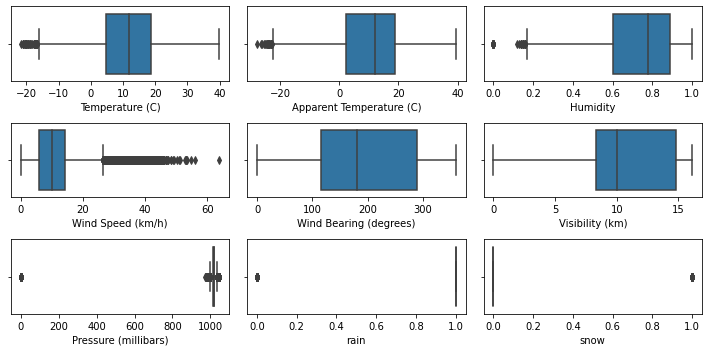

In [14]:
# Box plot all the columns to understand the data better
fig_box, axs_box = plt.subplots(3, 3, figsize=(10, 5))

# creating actual box plot
sns.boxplot(data['Temperature (C)'], ax = axs_box[0,0])
sns.boxplot(data['Apparent Temperature (C)'], ax = axs_box[0,1])
sns.boxplot(data['Humidity'], ax = axs_box[0,2])
sns.boxplot(data['Wind Speed (km/h)'], ax = axs_box[1,0])
sns.boxplot(data['Wind Bearing (degrees)'], ax = axs_box[1,1])
sns.boxplot(data['Visibility (km)'], ax = axs_box[1,2])
sns.boxplot(data['Pressure (millibars)'], ax = axs_box[2,0])
sns.boxplot(data['rain'], ax = axs_box[2,1])
sns.boxplot(data['snow'], ax = axs_box[2,2])
plt.tight_layout()

<AxesSubplot:xlabel='snow', ylabel='Humidity'>

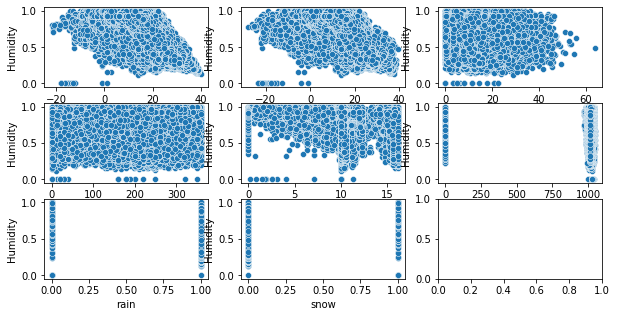

In [15]:
# draw scatter plot to understand data distribution better
fig_scat, axs_scat = plt.subplots(3, 3, figsize=(10, 5))
sns.scatterplot(data=data, x='Temperature (C)', y='Humidity', ax=axs_scat[0, 0])
sns.scatterplot(data=data, x='Apparent Temperature (C)', y='Humidity', ax=axs_scat[0, 1])
sns.scatterplot(data=data, x='Wind Speed (km/h)', y='Humidity', ax=axs_scat[0, 2])
sns.scatterplot(data=data, x='Wind Bearing (degrees)', y='Humidity', ax=axs_scat[1, 0])
sns.scatterplot(data=data, x='Visibility (km)', y='Humidity', ax=axs_scat[1, 1])
sns.scatterplot(data=data, x='Pressure (millibars)', y='Humidity', ax=axs_scat[1, 2])
sns.scatterplot(data=data, x='rain', y='Humidity', ax=axs_scat[2, 0])
sns.scatterplot(data=data, x='snow', y='Humidity', ax=axs_scat[2, 1])

In [16]:
# split data into features and target and convert humidity value from range to different class
X = data.iloc[:,1:]
Y = data.iloc[:,0].map(lambda x: 1 if x >= .7 else 0)

# Check correlation among features
X.corr()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),rain,snow
Temperature (C),1.000000,0.992629,0.008957,0.029988,0.392847,-0.005447,0.562620,-0.562620
Apparent Temperature (C),0.992629,1.000000,-0.056650,0.029031,0.381718,-0.000219,0.565207,-0.565207
Wind Speed (km/h),0.008957,-0.056650,1.000000,0.103822,0.100749,-0.049263,0.067928,-0.067928
Wind Bearing (degrees),0.029988,0.029031,0.103822,1.000000,0.047594,-0.011651,0.041984,-0.041984
Visibility (km),0.392847,0.381718,0.100749,0.047594,1.000000,0.059818,0.312875,-0.312875
Pressure (millibars),-0.005447,-0.000219,-0.049263,-0.011651,0.059818,1.000000,-0.009008,0.009008
rain,0.562620,0.565207,0.067928,0.041984,0.312875,-0.009008,1.000000,-1.000000
snow,-0.562620,-0.565207,-0.067928,-0.041984,-0.312875,0.009008,-1.000000,1.000000


In [17]:
# Split the dataset into 80:20 for training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Logistic Regression

In [18]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
lr.score(X_test, y_test)

0.8004769063293764

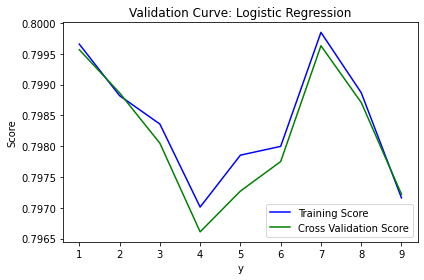

In [19]:
# validation curve for Logistic Regression
parameter_range = np.arange(1, 10, 1)
plot_validation_curve(title="Validation Curve: Logistic Regression",
                      X=X_train, y=y_train,
                      estimator=LogisticRegression(),
                      param_name='C',
                      parameter_range=np.arange(1, 10, 1))

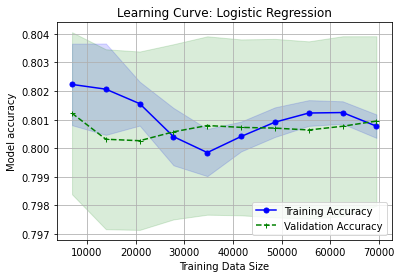

In [20]:
# learning curve for Logistic Regression
plot_learning_curve(title='Learning Curve: Logistic Regression',
                    estimator=LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000),
                    X=X_train,y=y_train)

### Decision Tree Classifier

In [21]:
# training DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
dt.predict(X_test)
dt.score(X_test, y_test)

0.8103778964283863

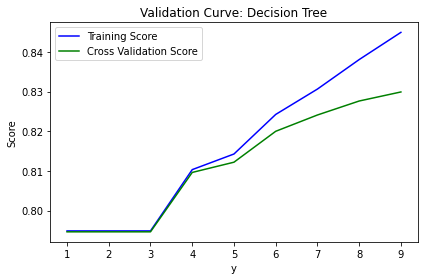

In [22]:
# validation curve for DecisionTreeClassifier
plot_validation_curve(title="Validation Curve: Decision Tree",
                      X=X_train, y=y_train,
                      estimator=DecisionTreeClassifier(),
                      param_name='max_depth',
                      parameter_range=np.arange(1, 10, 1))

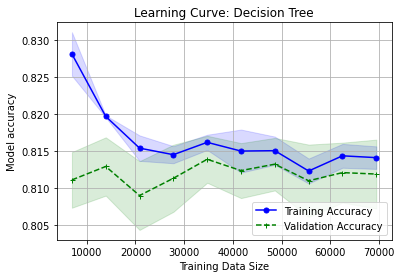

In [23]:
# learning curve for Decision Tree Classifier
plot_learning_curve(title='Learning Curve: Decision Tree',
                    estimator=DecisionTreeClassifier(max_depth=5, random_state=1),
                    X=X_train,y=y_train)

### K Nearest Neighbor

In [24]:
# training KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

0.8261883780001037

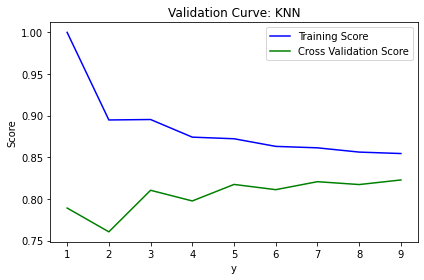

In [25]:
# plot validation curve for K Neighbor
plot_validation_curve(title="Validation Curve: KNN",
                      X=X_train, y=y_train,
                      estimator=KNeighborsClassifier(),
                      param_name='n_neighbors',
                      parameter_range=np.arange(1, 10, 1))

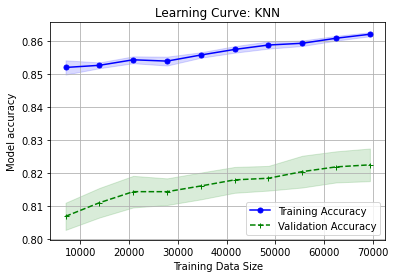

In [26]:
# plot learning curve for K Neighbor
plot_learning_curve(title='Learning Curve: KNN',
                    estimator=KNeighborsClassifier(n_neighbors=7),
                    X=X_train,y=y_train)

### Gradient Boosting

In [27]:
# Training Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb.predict(X_test)
gb.score(X_test, y_test)

0.8472344616660619

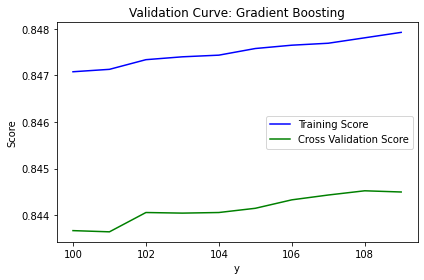

In [28]:
# plot validation curve for Gradient Boosting Classifier
plot_validation_curve(title="Validation Curve: Gradient Boosting",
                      X=X_train, y=y_train,
                      estimator=GradientBoostingClassifier(),
                      param_name='n_estimators',
                      parameter_range=np.arange(100, 110, 1))

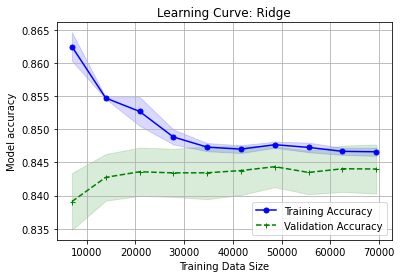

In [29]:
# plot learning curve for Ridge Classifier
plot_learning_curve(title='Learning Curve: Ridge',
                    estimator=GradientBoostingClassifier(n_estimators=100),
                    X=X_train,y=y_train)

### Random Forest

In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
rf.predict(X_test)
rf.score(X_test, y_test)

0.8394069773469494

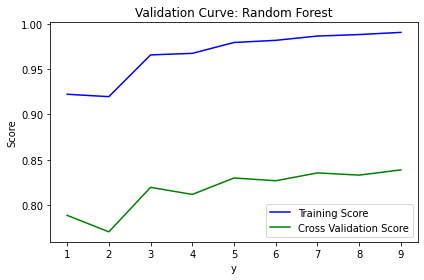

In [31]:
# plot validation curve for Random Forest Classifier
plot_validation_curve(title="Validation Curve: Random Forest",
                      X=X_train, y=y_train,
                      estimator=RandomForestClassifier(),
                      param_name='n_estimators',
                      parameter_range=np.arange(1, 10, 1))

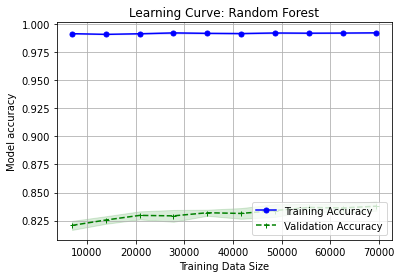

In [32]:
# plot learning curve for Random Forest Classifier
plot_learning_curve(title='Learning Curve: Random Forest',
                    estimator=RandomForestClassifier(n_estimators=10,random_state=1),
                    X=X_train,y=y_train)

### Voting Classifier

1) LogisticRegression
2) DecisionTreeClassifier
3) KNeighborsClassifier
4) RidgeClassifier
5) RandomForestClassifier

In [33]:
# Using Voting Classifier to measure result
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier([('lr', LogisticRegression()),
                                    ('dt', DecisionTreeClassifier(random_state=1)),
                                    ('knn', KNeighborsClassifier(n_neighbors=7)),
                                    ('rdg', GradientBoostingClassifier(n_estimators=100)),
                                    ('rf', RandomForestClassifier(n_estimators=10, random_state=1))
                                    ])
voting_classifier.fit(X_train, y_train)
voting_classifier.predict(X_test)
voting_classifier.score(X_test, y_test)

0.8496708309574413

# AutoML with TPOT

In [34]:
# AutoML with TPOT
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
tpot.score(X_test, y_test)

# Grid Search on Gradient Boosting Classifier

In [35]:
# Grid Search on Gradient Boosting Classifier for Hyper parameter tuning
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'n_estimators': [100],
              'learning_rate': [.1, .2, .3],
              'min_samples_split': [500, 1000, 1500],
              'min_samples_leaf': [25, 50, 75],
              'max_depth': [4, 8, 12, 16],
              'random_state': [1, 2, 3, 4, 5]
              }
base_estimator = GradientBoostingClassifier()
having = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                             factor=2,max_resources=30).fit(X_train, y_train)
having.best_estimator_

GradientBoostingClassifier(max_depth=4, min_samples_leaf=25,
                           min_samples_split=500, random_state=1)

### AUC-ROC Curve

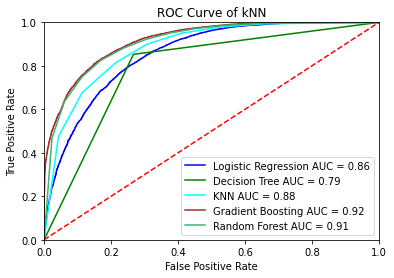

In [36]:
# plot auc-roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.title('Receiver Operating Characteristic')

# AUC-ROC LogisticRegression
lr_y_scores = lr.predict_proba(X_test)
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_y_scores[:, 1])
lr_roc_auc = auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, 'b', label = 'Logistic Regression AUC = %0.2f' % lr_roc_auc, color='blue')

# AUC-ROC Decision Tree
dt_y_scores = dt.predict_proba(X_test)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dt_y_scores[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)
plt.plot(dt_fpr, dt_tpr, 'b', label = 'Decision Tree AUC = %0.2f' % dt_roc_auc, color='green')

# AUC-ROC KNN
knn_y_scores = knn.predict_proba(X_test)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_y_scores[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)
plt.plot(knn_fpr, knn_tpr, 'b', label = 'KNN AUC = %0.2f' % knn_roc_auc, color='cyan')

# AUC-ROC Gradient Boosting
gb_y_scores = gb.predict_proba(X_test)
gb_fpr, gb_tpr, gb_threshold = roc_curve(y_test, gb_y_scores[:, 1])
gb_roc_auc = auc(gb_fpr, gb_tpr)
plt.plot(gb_fpr, gb_tpr, 'b', label = 'Gradient Boosting AUC = %0.2f' % gb_roc_auc, color='brown')

# AUC-ROC Random Forest
rf_y_scores = rf.predict_proba(X_test)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_y_scores[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, 'b', label = 'Random Forest AUC = %0.2f' % rf_roc_auc, color='mediumseagreen')


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

### Principal Component Analysis

Text(0, 0.5, 'cumulative explained variance')

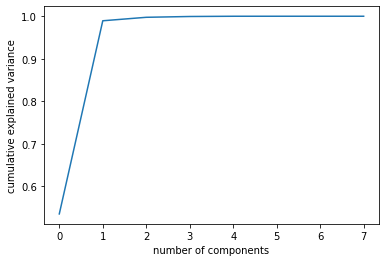

In [37]:
#
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [47]:
pca2 = PCA(n_components=2)
pca2.fit(X_train)
X_train_pca = pca2.transform(X_train)
X_test_pca = pca2.transform(X_test)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)

original shape:    (77162, 8)
transformed shape: (77162, 2)


In [48]:
# Fit reduced dimensioned data to Logistic Regression and measure score
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
lr_pca.predict(X_test_pca)
lr_pca.score(X_test_pca, y_test)


0.6447566222590846